In [1]:
import pygeos
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as colors
import datetime

In [2]:
%%time
# load data
building_footprints = gpd.read_file('./data/raw/building_footprints_google_w_villages.geojson') # google_osm_footprints
village_boundaries = gpd.read_file('./data/raw/village_shapefile_data/RWA_adm5.shp') # village boundaries

# convert to lowercase
cols = ['NAME_2','NAME_3','NAME_4','NAME_5']
for col in cols:
    village_boundaries[col] = village_boundaries[col].str.lower()
     building_footprints[col] = building_footprints[col].str.lower()
     
        
# Identify unique villages
building_footprints['unique_village'] = building_footprints['NAME_2']+'_'+building_footprints['NAME_3']+'_'+building_footprints['NAME_4']+'_'+building_footprints['NAME_5']
village_boundaries['unique_village'] = village_boundaries['NAME_2']+'_'+village_boundaries['NAME_3']+'_'+village_boundaries['NAME_4']+'_'+village_boundaries['NAME_5']

CPU times: user 12min 56s, sys: 21.5 s, total: 13min 18s
Wall time: 13min 21s


In [59]:
%%time
# microsoft buildings
microsoft_buildings = gpd.read_file('./data/raw/building_footprints_microsoft_w_districts.geojson')

CPU times: user 2min 46s, sys: 945 ms, total: 2min 47s
Wall time: 2min 48s


In [64]:
%%time
microsoft_buildings_villages = microsoft_buildings[['District','geometry']].sjoin(village_boundaries[['unique_village','geometry']])

CPU times: user 2min 4s, sys: 182 ms, total: 2min 4s
Wall time: 2min 5s


In [69]:
building_count = microsoft_buildings_villages.groupby(['unique_village']).District.count().reset_index().rename(columns={'District':'building_count'})

In [21]:
cols = ['area_in_meters', 'unique_village']
building_area_exploration = building_footprints[cols].copy()

In [73]:
# building area stats
print(building_area_exploration.area_in_meters.describe())
# group by village
building_count = building_area_exploration.groupby(['unique_village'])['area_in_meters'].count().reset_index().rename(columns={'area_in_meters':'building_count'})

count    5.948660e+06
mean     3.838680e+01
std      5.471727e+01
min      1.843719e-02
25%      1.374000e+01
50%      2.731040e+01
75%      4.828323e+01
max      1.250371e+04
Name: area_in_meters, dtype: float64


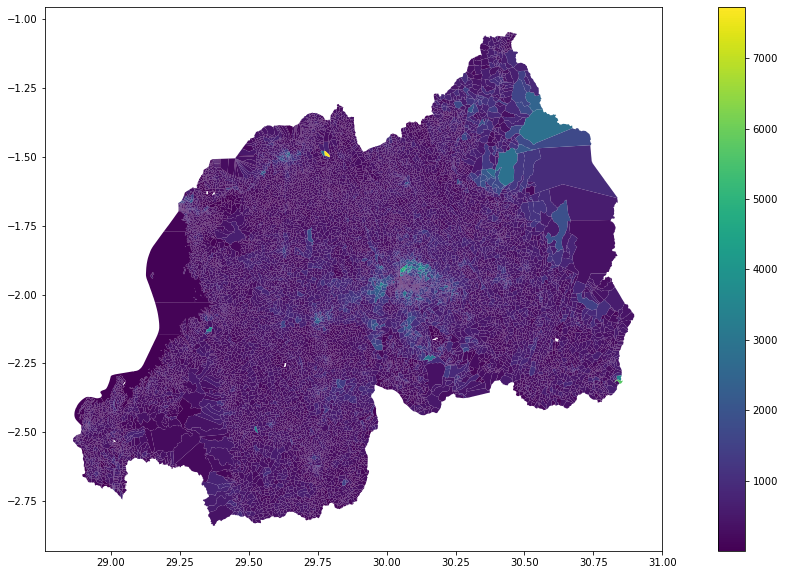

In [74]:
# spatial distribution building footprints in rwanda by village
village_building_count = village_boundaries.merge(building_count, how='left', on='unique_village')
fig, ax = plt.subplots(1, figsize=(20, 10))
village_building_count.plot(ax=ax, column='building_count', legend=True)
plt.show()

In [52]:
%%time
# lower area
lower_area_buildings = building_area_exploration[building_area_exploration.area_in_meters<=27.3104]
lower_area_building_count = lower_area_buildings.groupby(['unique_village'])['area_in_meters'].count().reset_index().rename(columns={'area_in_meters':'building_count'})
# larger area
larger_area_buildings = building_area_exploration[building_area_exploration.area_in_meters>=27.3104]
larger_area_building_count = larger_area_buildings.groupby(['unique_village'])['area_in_meters'].count().reset_index().rename(columns={'area_in_meters':'building_count'})

# building count
low_village_building_count = village_boundaries.merge(lower_area_building_count, how='left', on='unique_village')
large_village_building_count = village_boundaries.merge(larger_area_building_count, how='left', on='unique_village')

CPU times: user 1.65 s, sys: 4.99 ms, total: 1.66 s
Wall time: 1.66 s


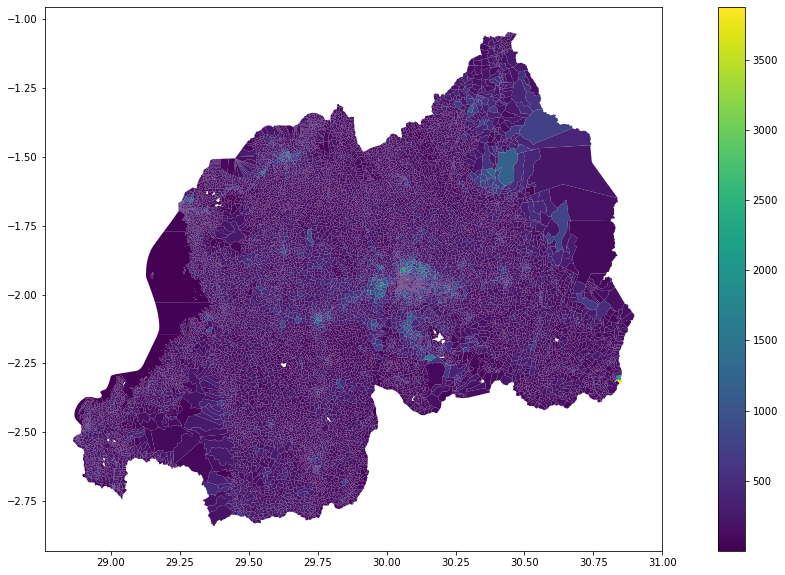

In [56]:
# small or larger buildings
fig, ax = plt.subplots(1, figsize=(20, 10))
large_village_building_count.plot(ax=ax, column='building_count', legend=True)
plt.show()